In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")
df = data.copy()

In [11]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
df.shape

(1460, 81)

In [15]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [16]:
numeric_cols = df.select_dtypes(include=['int64','float64'])
corr_matrix = numeric_cols.corr()

In [17]:
saleprice_corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False)
high_corr = saleprice_corr[saleprice_corr > 0.5]
print(high_corr)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


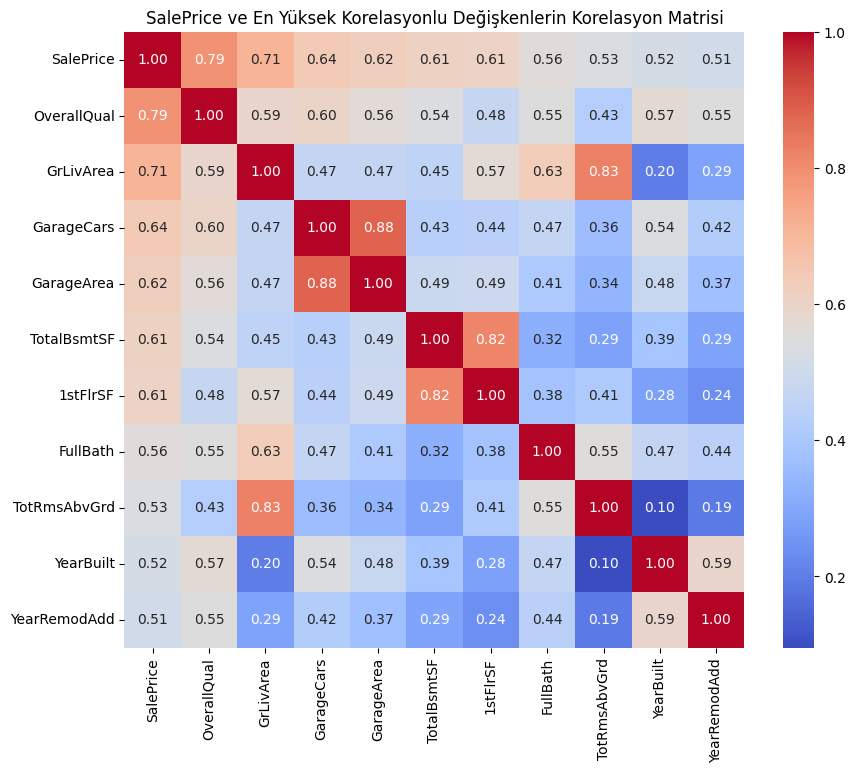

In [18]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
        'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
subset_corr = corr_matrix.loc[cols, cols]
plt.figure(figsize=(10,8))
sns.heatmap(subset_corr, annot=True, fmt=  ".2f", cmap="coolwarm", cbar=True)
plt.title("SalePrice ve En Yüksek Korelasyonlu Değişkenlerin Korelasyon Matrisi")
plt.show()

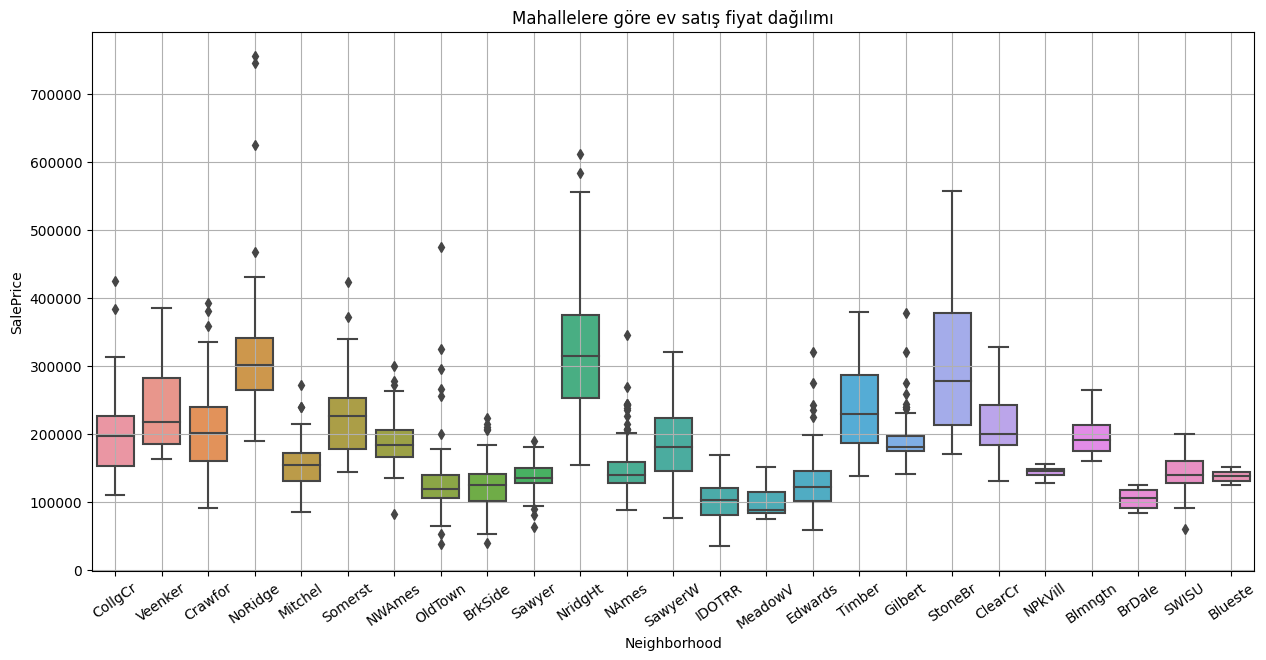

In [19]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Neighborhood',y='SalePrice', data=df)
plt.xticks(rotation=35)
plt.title('Mahallelere göre ev satış fiyat dağılımı')
plt.grid(True)
plt.show()

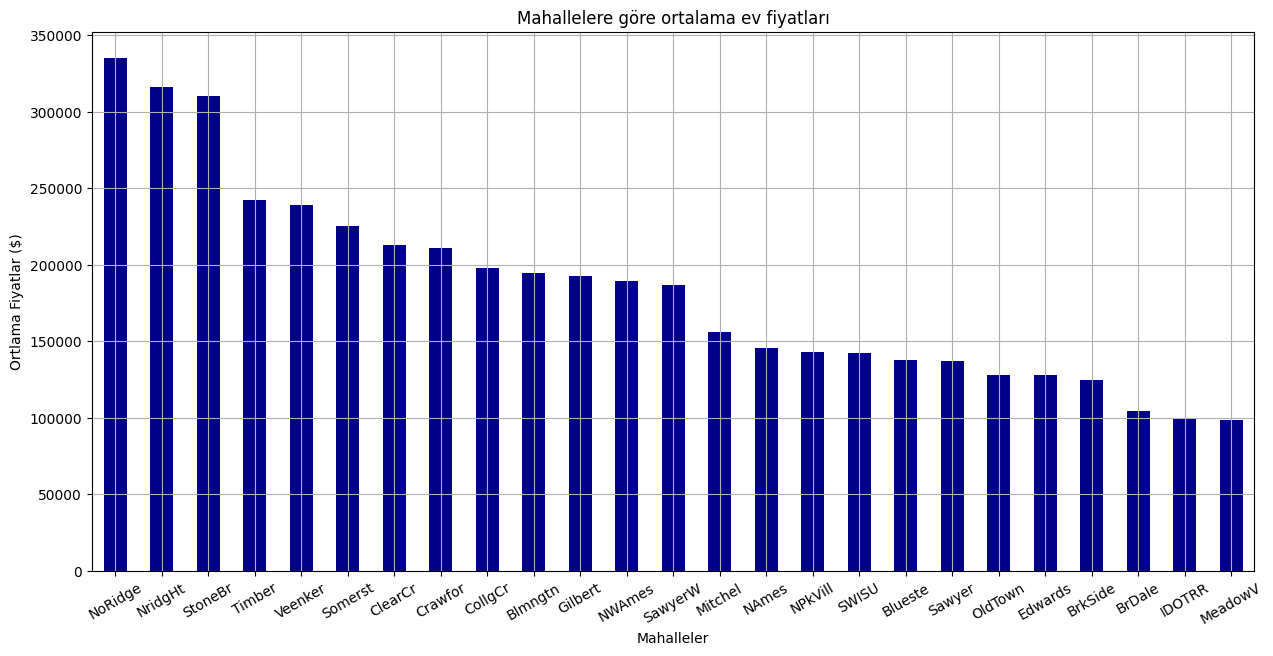

In [20]:
average_price = df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)

plt.figure(figsize=(15,7))
average_price.plot(kind='bar', color='darkblue')
plt.title('Mahallelere göre ortalama ev fiyatları')
plt.ylabel('Ortlama Fiyatlar ($)')
plt.xlabel('Mahalleler')
plt.xticks(rotation=30)
plt.grid(True)
plt.show()

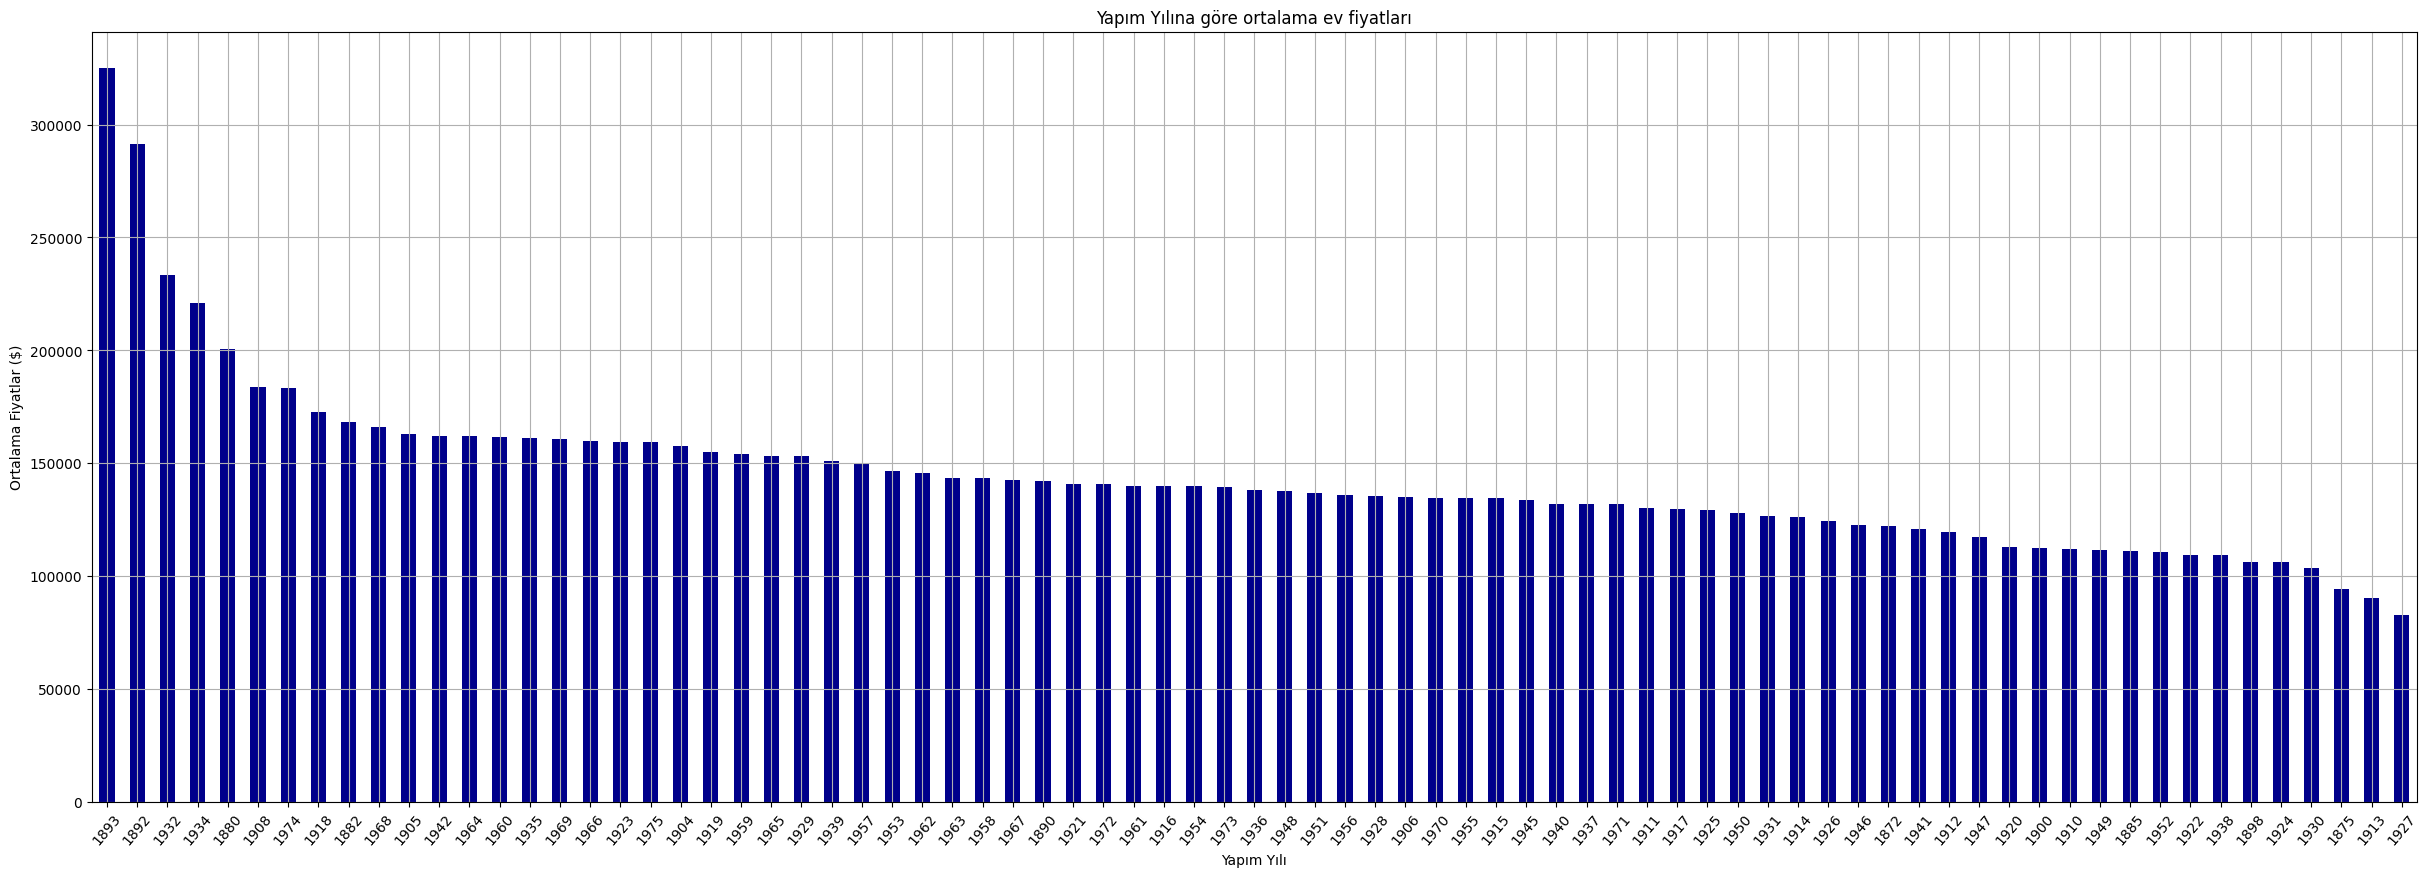

In [24]:
filtered_df = df[df['YearBuilt'] <= 1975]
average_price = filtered_df.groupby('YearBuilt')['SalePrice'].mean().sort_values(ascending=False)

plt.figure(figsize=(30,10))
average_price.plot(kind='bar', color='darkblue')
plt.title('1975 Yılı ve daha eski evlerin fiyatları')
plt.ylabel('Ortalama Fiyatlar ($)')
plt.xlabel('Yapım Yılı')
plt.xticks(rotation=50)
plt.grid(True)
plt.show()

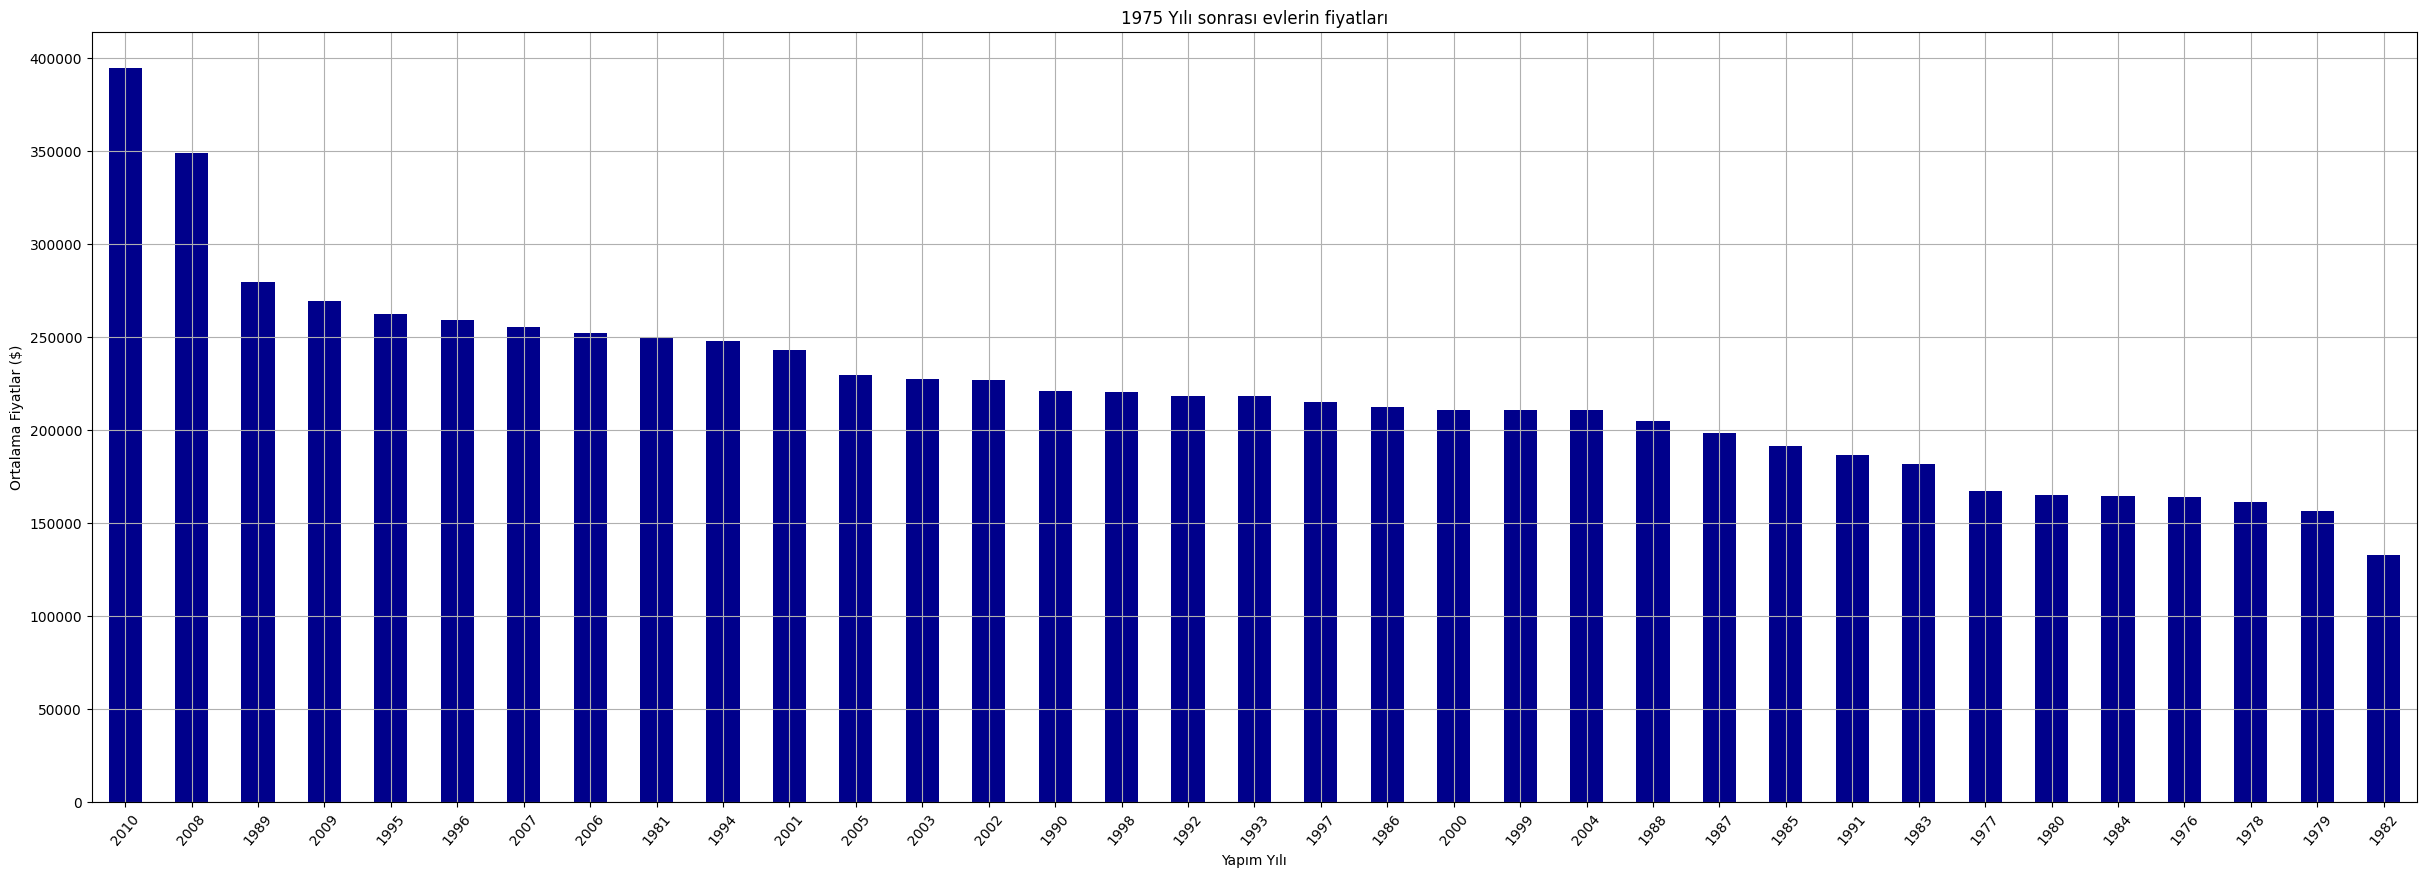

In [28]:
filtered2_df = df[df['YearBuilt'] > 1975]
average_price = filtered2_df.groupby('YearBuilt')['SalePrice'].mean().sort_values(ascending=False)

plt.figure(figsize=(30,10))
average_price.plot(kind='bar', color='darkblue')
plt.title('1975 Yılı sonrası evlerin fiyatları')
plt.ylabel('Ortalama Fiyatlar ($)')
plt.xlabel('Yapım Yılı')
plt.xticks(rotation=50)
plt.grid(True)
plt.show()

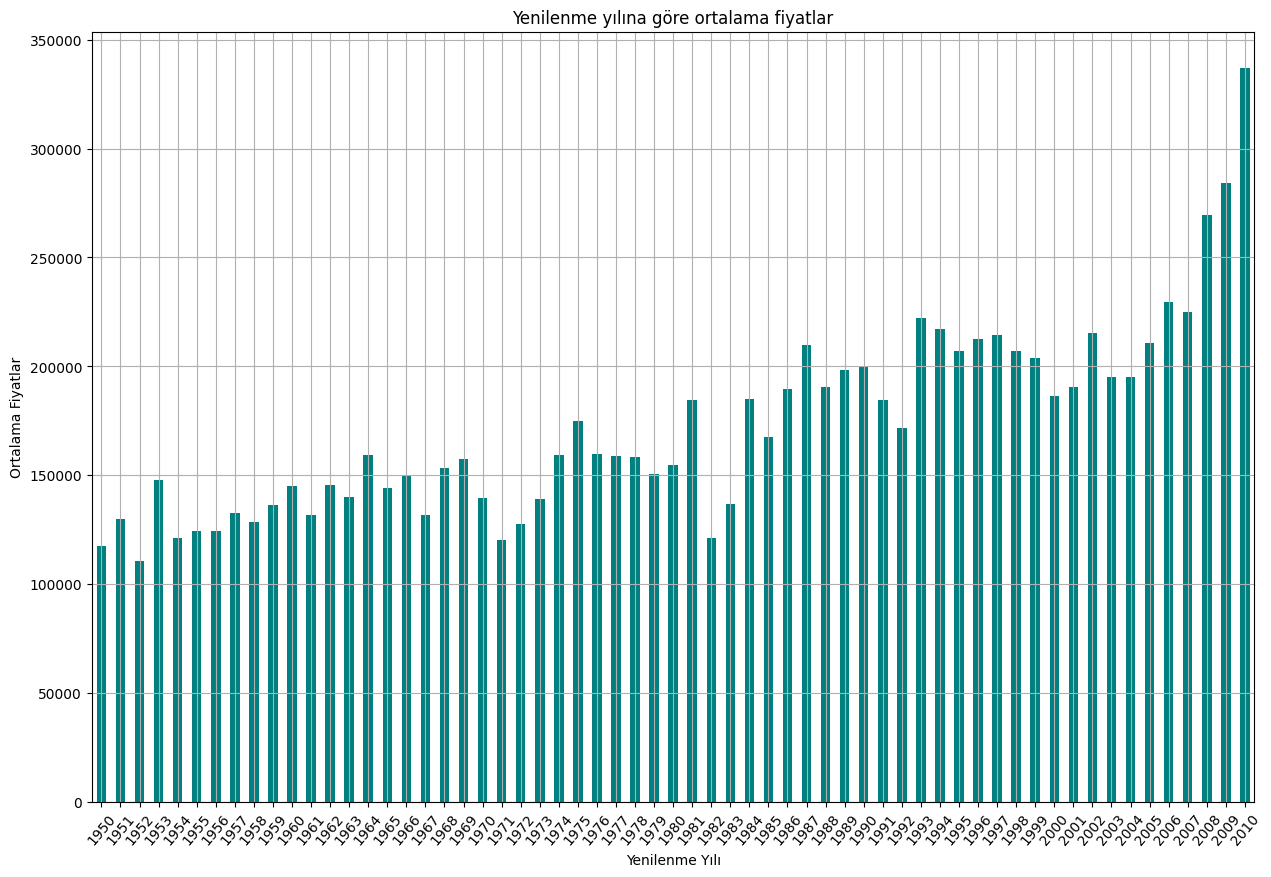

In [29]:
remod_price = df.groupby('YearRemodAdd')['SalePrice'].mean().sort_index()

plt.figure(figsize=(15,10))
remod_price.plot(kind='bar', color='teal')
plt.title('Yenilenme yılına göre ortalama fiyatlar')
plt.xlabel('Yenilenme Yılı')
plt.ylabel('Ortalama Fiyatlar')
plt.xticks(rotation=50)
plt.grid(True)
plt.show()

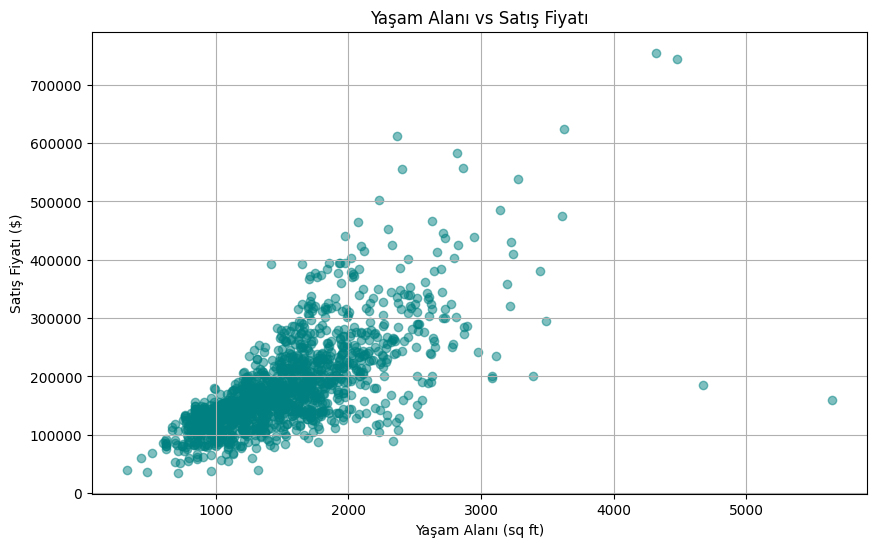

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(df['GrLivArea'], df['SalePrice'], alpha=0.5, color='teal')
plt.title('Yaşam Alanı vs Satış Fiyatı')
plt.xlabel('Yaşam Alanı (sq ft)')
plt.ylabel('Satış Fiyatı ($)')
plt.grid(True) #Grafiğin ızgaralı olmasını sağlar
plt.show()

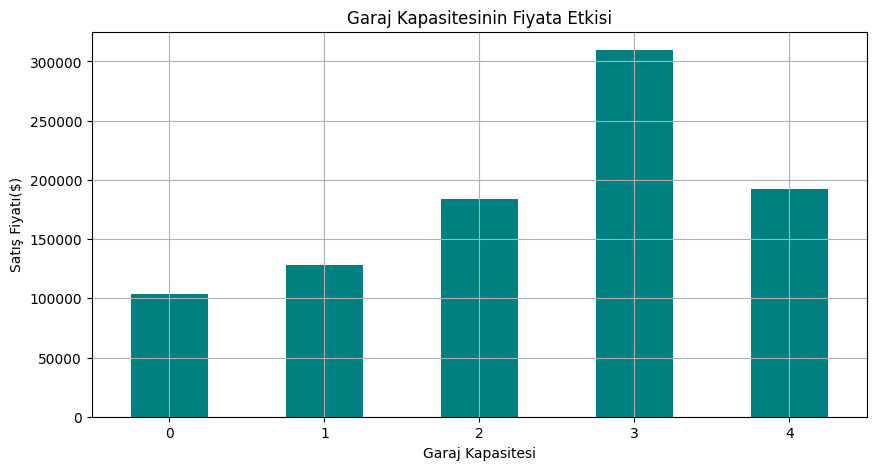

In [31]:
garage_capacity = df.groupby('GarageCars')['SalePrice'].mean()

plt.figure(figsize=(10,5))
garage_capacity.plot(kind='bar', color='teal')
plt.title('Garaj Kapasitesinin Fiyata Etkisi')
plt.xlabel('Garaj Kapasitesi')
plt.xticks(rotation=0)
plt.ylabel('Satış Fiyatı($)')
plt.grid(True)
plt.show()

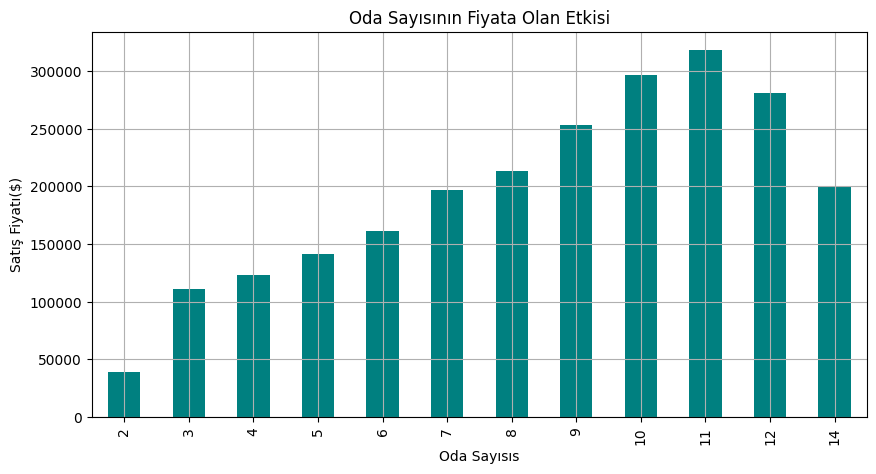

In [32]:
room_price = df.groupby('TotRmsAbvGrd')['SalePrice'].mean()
plt.figure(figsize=(10,5))
room_price.plot(kind='bar', color='teal')
plt.title('Oda Sayısının Fiyata Olan Etkisi')
plt.xlabel('Oda Sayısıs')
plt.ylabel('Satış Fiyatı($)')
plt.grid(True)
plt.show()